# Imports and config

In [1]:
import os

import numpy as np
import pandas as pd

directory = os.getcwd().split('/')[-1]

if directory == 'notebooks':
    %cd ..

/home/nicklas/repos/gecco-2023-ambulance-allocation/scripts


In [2]:
# Matplotlib & seaborn setup
import matplotlib
import seaborn as sns
# matplotlib.use('PDF')

sns.set(rc={'figure.figsize':(11, 4)})
sns.set_style('ticks')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

print(f'matplotlib backend: {matplotlib.get_backend()}')

matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
# configuration variables
should_save = False

In [4]:
incidents = pd.read_csv('proprietary_data/processed_data.csv', index_col=0, parse_dates=True).sort_index()
incidents

,xcoor,ycoor,hastegrad,tiltak_type,rykker_ut,ank_hentested,avg_hentested,ledig_ikketransport,ledig_transport,non_transporting_vehicles,transporting_vehicles
tidspunkt,,,,,,,,,,,
2016-12-31 20:05:50,262500,6649500,H,Ambulanse,2016-12-31 20:35:12,2016-12-31 20:37:20,2016-12-31 20:48:26,2016-12-31 21:35:30,2016-12-31 21:35:30,0,1
2016-12-31 20:08:19,265500,6644500,H,Ambulanse,2016-12-31 20:17:18,2016-12-31 20:28:35,NaN,2016-12-31 21:03:00,2016-12-31 21:03:00,1,0
2016-12-31 20:28:57,260500,6651500,H,Ambulanse,2016-12-31 20:41:16,2016-12-31 20:42:34,2016-12-31 21:15:00,2016-12-31 21:30:53,2016-12-31 21:30:53,0,1
2016-12-31 20:29:01,259500,6652500,A,Ambulanse,2016-12-31 20:31:20,2016-12-31 20:33:54,2016-12-31 20:52:37,2016-12-31 21:17:17,2016-12-31 21:17:17,0,1
2016-12-31 20:30:37,259500,6654500,A,Ambulanse,2016-12-31 20:32:41,2016-12-31 20:39:31,2016-12-31 21:29:24,2016-12-31 21:50:00,2016-12-31 21:50:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:51:06,279500,6653500,A,Ambulanse,2018-12-31 19:53:48,2018-12-31 19:59:27,2018-12-31 20:33:15,2018-12-31 21:09:47,2018-12-31 21:09:47,0,1
2018-12-31 19:53:05,262500,6651500,H,Ambulanse,2018-12-31 20:48:22,2018-12-31 21:01:41,2018-12-31 21:33:17,2018-12-31 22:26:31,2018-12-31 22:26:31,0,1
2018-12-31 19:56:19,269500,6653500,A,Ambulanse,2018-12-31 19:58:34,2018-12-31 20:03:12,2018-12-31 20:22:33,2018-12-31 20:43:33,2018-12-31 20:43:33,0,1


# Resampling

In [5]:
incidents_hourly = pd.DataFrame(incidents.resample('H').count()['hastegrad'])
incidents_hourly = incidents_hourly.rename(columns={'hastegrad': 'incidents'})
incidents_hourly = incidents_hourly.sort_index()
incidents_hourly

,incidents
tidspunkt,
2016-12-31 20:00:00,7
2016-12-31 21:00:00,11
2016-12-31 22:00:00,9
2016-12-31 23:00:00,22
2017-01-01 00:00:00,30
...,...
2018-12-31 15:00:00,9
2018-12-31 16:00:00,12
2018-12-31 17:00:00,5


## Hourly incidents

In [22]:
incidents_hourly['hour'] = incidents_hourly.index.hour
incidents_hourly['day'] = incidents_hourly.index.day
incidents_hourly['week'] = incidents_hourly.index.isocalendar().week
incidents_hourly['month'] = incidents_hourly.index.month
incidents_hourly['year'] = incidents_hourly.index.year
incidents_hourly['weekday'] = incidents_hourly.index.weekday
incidents_hourly

,incidents,hour,day,month,year,weekday,week
tidspunkt,,,,,,,
2016-12-31 20:00:00,7,20,31,12,2016,5,52
2016-12-31 21:00:00,11,21,31,12,2016,5,52
2016-12-31 22:00:00,9,22,31,12,2016,5,52
2016-12-31 23:00:00,22,23,31,12,2016,5,52
2017-01-01 00:00:00,30,0,1,1,2017,6,52
...,...,...,...,...,...,...,...
2018-12-31 15:00:00,9,15,31,12,2018,0,1
2018-12-31 16:00:00,12,16,31,12,2018,0,1
2018-12-31 17:00:00,5,17,31,12,2018,0,1


## Daily incidents

In [23]:
incidents_daily =  pd.DataFrame(incidents_hourly['incidents'].resample('D').sum())
incidents_daily['week'] = incidents_daily.index.isocalendar().week
incidents_daily['month'] = incidents_daily.index.month
incidents_daily['year'] = incidents_daily.index.year
incidents_daily['weekday'] = incidents_daily.index.weekday
incidents_daily

,incidents,week,month,year,weekday
tidspunkt,,,,,
2016-12-31,49,52,12,2016,5
2017-01-01,367,52,1,2017,6
2017-01-02,281,1,1,2017,0
2017-01-03,300,1,1,2017,1
2017-01-04,262,1,1,2017,2
...,...,...,...,...,...
2018-12-27,351,52,12,2018,3
2018-12-28,301,52,12,2018,4
2018-12-29,310,52,12,2018,5


## Aggregated weekly average

In [8]:
incidents_weekly_average = incidents_hourly['incidents'] \
    .groupby([incidents_hourly.weekday, incidents_hourly.hour]) \
    .agg(['mean', 'std'])

reference_week = pd.date_range(start='1/5/2015', end='1/12/2015', closed='left', freq='H')
incidents_weekly_average = incidents_weekly_average.set_index(reference_week)
incidents_weekly_average['weekday'] = incidents_weekly_average.index.weekday
incidents_weekly_average

/tmp/ipykernel_90590/2131890549.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  reference_week = pd.date_range(start='1/5/2015', end='1/12/2015', closed='left', freq='H')


,mean,std,weekday
2015-01-05 00:00:00,8.209524,3.537424,0
2015-01-05 01:00:00,7.076190,3.121560,0
2015-01-05 02:00:00,6.390476,3.309355,0
2015-01-05 03:00:00,5.723810,3.566660,0
2015-01-05 04:00:00,5.371429,2.916324,0
...,...,...,...
2015-01-11 19:00:00,13.390476,3.638721,6
2015-01-11 20:00:00,13.200000,3.528456,6
2015-01-11 21:00:00,12.304762,3.600544,6
2015-01-11 22:00:00,10.476190,2.919086,6


## Monthly incidents

In [9]:
incidents_monthly =  pd.DataFrame(incidents_daily['incidents'].resample('M').sum())
incidents_monthly['year'] = incidents_monthly.index.year
incidents_monthly

,incidents,year
tidspunkt,,
2016-12-31,49,2016
2017-01-31,8557,2017
2017-02-28,7207,2017
2017-03-31,7708,2017
2017-04-30,7045,2017
2017-05-31,8146,2017
2017-06-30,7727,2017
2017-07-31,7266,2017
2017-08-31,7616,2017


## Yearly incidents

In [10]:
incidents_yearly =  pd.DataFrame(incidents_monthly['incidents'].resample('Y').sum())
incidents_yearly

,incidents
tidspunkt,
2016-12-31,49
2017-12-31,93635
2018-12-31,98701


# Plotting

# Auto-correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

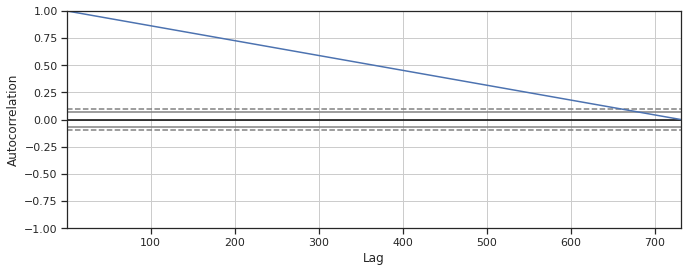

In [11]:
# TODO
pd.plotting.autocorrelation_plot(incidents_daily)


## Incidents per day

/tmp/ipykernel_90590/803033494.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor')
/tmp/ipykernel_90590/803033494.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major')


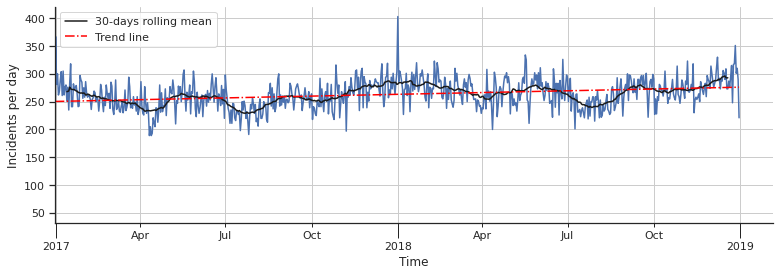

In [12]:
x, y = incidents_daily.index, incidents_daily.incidents
ax = sns.lineplot(data=incidents_daily, x=x, y=y)
ax.set(xlabel='Time', ylabel='Incidents per day')

rolling_mean = y.rolling(window=30, center=True, min_periods=28).mean()
ax.plot(rolling_mean, 'k-', label='30-days rolling mean')

x = mdates.date2num(x)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), linestyle='-.', color='red', label='Trend line')


sns.despine()
ax.legend()

ax.set_xlim(left=incidents_daily.index[0])

# Minor axis
ax.grid(b=True, which='minor')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4, 7, 10]))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Major axis
ax.grid(b=True, which='major')
ax.tick_params(which='major', axis='x', length=15, width=1)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

if should_save:
    plt.savefig('results/daily_incidents.pdf', dpi=600)

## Monthly plots

In [13]:
def int_to_month(x, _):
    months = [
        'Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'Jun',
        'Jul',
        'Aug',
        'Sep',
        'Oct',
        'Nov',
        'Dec'
    ]
    return months[x]


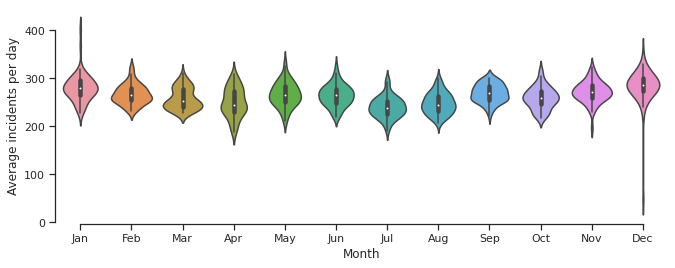

In [14]:
ax = sns.violinplot(data=incidents_daily, x='month', y='incidents')
ax.set(xlabel='Month', ylabel='Average incidents per day')

sns.despine(trim=True)

ax.xaxis.set_major_formatter(FuncFormatter(int_to_month))

if should_save:
    plt.savefig('results/monthly_violin_plot.pdf', dpi=600)

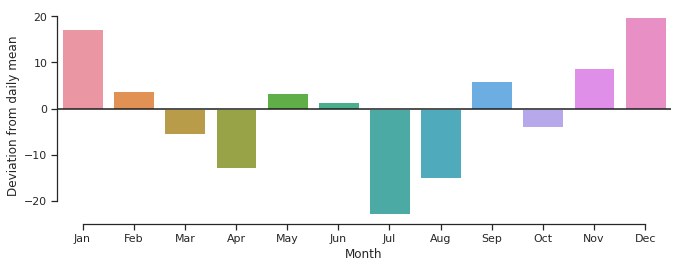

In [15]:
mean = incidents_daily['incidents'].mean()
deviation = incidents_daily['incidents'].groupby([incidents_daily.month]).mean() - mean

ax = sns.barplot(x=deviation.index, y=deviation)
ax.set(xlabel='Month', ylabel='Deviation from daily mean')
ax.axhline(0, color='k')

sns.despine(trim=True)

ax.xaxis.set_major_formatter(FuncFormatter(int_to_month))

if should_save:
    plt.savefig('results/monthly_deviation_from_mean.pdf', dpi=600)

## Weekplot 

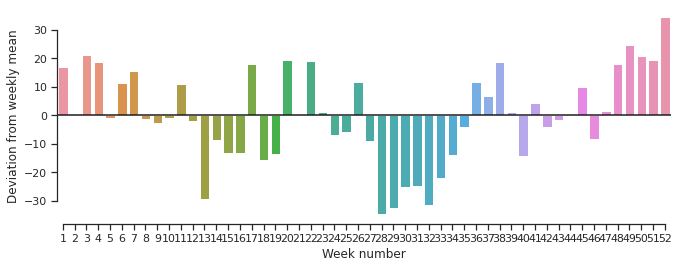

In [37]:
YEAR_OF_INTEREST = 2018

mean = incidents_daily['incidents'][incidents_daily.index.year == YEAR_OF_INTEREST].mean()
weekly_deviation = incidents_daily['incidents'][incidents_daily.index.year == YEAR_OF_INTEREST].groupby([incidents_daily.week]).mean() - mean

ax = sns.barplot(x=weekly_deviation.index, y=weekly_deviation)
ax.set(xlabel='Week number', ylabel='Deviation from weekly mean')
ax.axhline(0, color='k')

sns.despine(trim=True)

# ax.xaxis.set_major_formatter(FuncFormatter(int_to_month))

if should_save:
    plt.savefig('results/monthly_deviation_from_mean.pdf', dpi=600)


In [53]:
quiet_week = weekly_deviation.idxmin()
average_week = weekly_deviation.abs().idxmin()
busy_week = weekly_deviation.idxmax()

print(f'Quiet week:   {quiet_week}')
print(f'Average week: {average_week}')
print(f'Busy week:    {busy_week}')

Quiet week:   28
Average week: 2
Busy week:    52


## Weekday violin plot

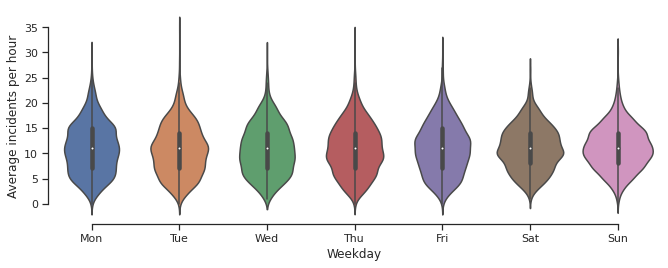

In [16]:
def int_to_weekday(x, _):
    return ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][x]

ax = sns.violinplot(data=incidents_hourly, x='weekday', y='incidents')
ax.set(xlabel='Weekday', ylabel='Average incidents per hour')

sns.despine(trim=True)

ax.xaxis.set_major_formatter(FuncFormatter(int_to_weekday))

if should_save:
    plt.savefig('results/weekday_violin_plot.pdf', dpi=600)

## Hourly average

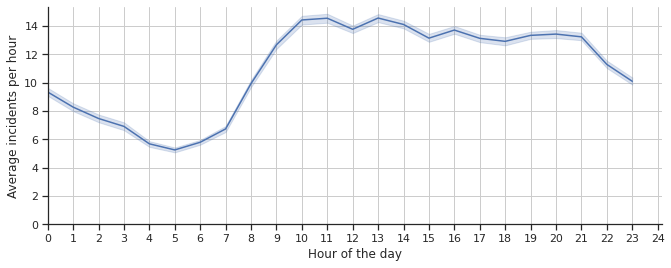

In [17]:
ax = sns.lineplot(data=incidents_hourly, x='hour', y='incidents')

ax.set(xlabel='Hour of the day', ylabel='Average incidents per hour')

sns.despine()

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

ax.grid()
ax.xaxis.set_ticks(np.arange(0, 25, 1))

if should_save:
    plt.savefig('results/daily_average.pdf', dpi=600)

## Per day average 

/tmp/ipykernel_90590/2517214774.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='rosybrown', linestyle='--')
/tmp/ipykernel_90590/2517214774.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major')


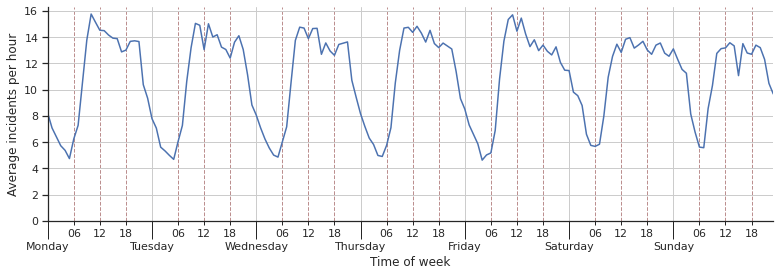

In [18]:

ax = sns.lineplot(data=incidents_weekly_average, x=incidents_weekly_average.index, y='mean')
ax.set(xlabel='Time of week', ylabel='Average incidents per hour')

sns.despine()

ax.set_xlim([incidents_weekly_average.index[0], incidents_weekly_average.index[-1]])
ax.set_ylim(bottom=0)

# Minor axis
ax.grid(b=True, which='minor', color='rosybrown', linestyle='--')
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[6, 12, 18]))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Major axis
ax.grid(b=True, which='major')
ax.tick_params(which='major', axis='x', length=17.5, width=1)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))

plt.tight_layout()

if should_save:
    plt.savefig('results/average_week.pdf', dpi=600)